In [8]:
import mitsuba as mi
import drjit as dr
import matplotlib.pyplot as plt
mi.set_variant('cuda_ad_rgb')

In [9]:
import numpy as np 
def generate_points_circle(r, amount, height):
    return [mi.ScalarPoint3f(np.sin(2*np.pi/amount*x)*r, -np.cos(2*np.pi/amount*x)*r, height) for x in range(0,  amount + 1)]   

In [10]:
from mitsuba import ScalarTransform4f as T
def create_sensor_at_position(pos):
    moving_sensor = {
        'type': 'perspective',
        'film': {
            'type': 'hdrfilm',
            'width': 2000, 'height': 2000,
            'filter': {'type': 'gaussian'},
            'sample_border': True
        },
        'fov': 45,
        'to_world': T.look_at(target=[0, 0, 0], origin=pos, up=[0, 0, 1])
    }
    return moving_sensor

In [11]:
def create_sphere_light_source(position, radius, intensity):
    return {
        'type': 'sphere',
        'center': position,
        'radius': radius,
       'emitter': {
            'type': 'area',
            'radiance': {
                'type': 'rgb',
                'value': intensity,
            }
        }
    }

In [12]:

scene_dict_ref = {
    'type': 'scene',
    'integrator': {
        'type': 'path'
    },
#     'sensor': sensor,
    'sphere_0': create_sphere_light_source([0, 0, 8.0], 0.2, 1250.0),
    'heightfield': {
        'type': 'heightfield',
        # 'resolution_x': 500,
        # 'resolution_y': 100,
        'filename': 'data/oppenheimer_smooth.bmp',
        'per_vertex_n': False,
        'max_height': .3,
        'bsdf': {
            'type': 'diffuse',
            'reflectance': {
                'type': 'rgb',
                'value': [0.5, 0.5, 0.5]
            }
        },
        'to_world':T.translate((0.0,0,0.5)) 
    },
    # 'right': {
    #     'type': 'rectangle',
    #     'material': {
    #         'type': 'diffuse',
    #         'reflectance': {
    #             'type': 'rgb',
    #             'value': [0.4, 0.0, 0.0]
    #         }
    #     },
    #     'to_world':T.translate((0.66,0.2,0.6)) @ T.scale((0.32,0.3,1.0))
    # },
    #    'left': {
    #     'type': 'rectangle',
    #     'material': {
    #         'type': 'diffuse',
    #         'reflectance': {
    #             'type': 'rgb',
    #             'value': [0.4, 0.0, 0.0]
    #         }
    #     },
    #     'to_world':T.translate((-0.67,0.2,0.6)) @ T.scale((0.32,0.3,1.0))

    # },
}

In [13]:
camera_points_circle = generate_points_circle(2, 300, 10)

In [14]:
# # Render reconstructed shape from generated viewpoints
# for i in range(len(camera_points_circle)):
#     sensor = create_sensor_at_position(camera_points_circle[i])
#     scene_dict_ref['sensor'] = sensor
#     scene_final = mi.load_dict(scene_dict_ref)
#     final_img = mi.render(scene_final, spp=128)
#     mi.util.write_bitmap(f"output/epfl/img{i}.png", final_img)

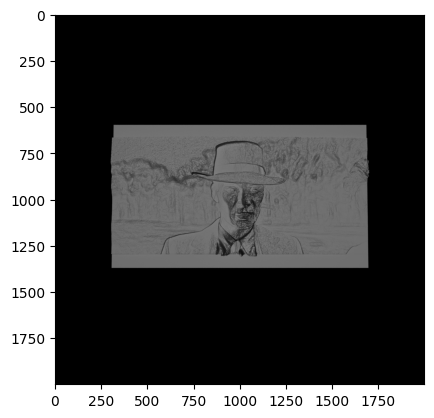

In [15]:
sensor = create_sensor_at_position((0,-0.2, 4))
scene_dict_ref['sensor'] = sensor
scene = mi.load_dict(scene_dict_ref)
img = mi.render(scene, spp=16)
plt.imshow(img)
mi.util.write_bitmap("output/oppenheimer.png", img)